<h1 style="color:rgb(0,120,170)">PCA and Kernel PCA</h1>

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1:</h3>

2. Show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative.

- Eigenvector equation: $Cw =  \lambda w$ 
- Positive semi-definiteness: $x^TCx \geq 0$
- using both facts: $w^TCw = w^T\lambda w = w^Tw\lambda$
- $w^Tw$ are positive -> $\lambda$ is positive.



<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [2]:
#read data
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 


import scipy
import matplotlib
import sklearn
import numpy as np
import pandas as pd


print('sklearn version:',sklearn.__version__)
print('pandas version:',pd.__version__)
print('scipy version:',scipy.__version__)
print('numpy version:',np.__version__)
print('pandas version:',pd.__version__)
print('matplotlib version:',matplotlib.__version__)

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

sklearn version: 1.1.2
pandas version: 1.4.2
scipy version: 1.9.2
numpy version: 1.21.5
pandas version: 1.4.2
matplotlib version: 3.5.1


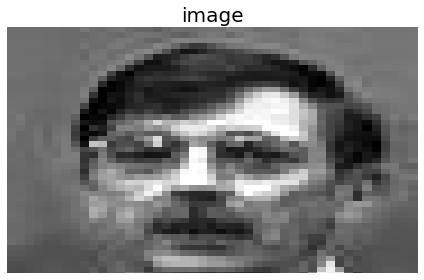

In [3]:
#plot first image as an example. Nothing to do here
def plotImg(x,title):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    ax.set_title(title,fontsize = 20)
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :],'image')

<h3 style="color:rgb(210,90,80)">Exercise 2:</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [4]:
#50% variance
pca = PCA(n_components=3)
data_red = pca.fit_transform(data)
print('Number of components for 50% variance:',pca.n_components)
print('Explained variance:',sum(pca.explained_variance_ratio_))
print("----------")
#75% variance
pca = PCA(n_components=18)
data_red = pca.fit_transform(data)
print('Number of components for 75% variance:',pca.n_components)
print('Explained variance:',sum(pca.explained_variance_ratio_))
print("----------")
#99% variance
pca = PCA(n_components=380)
data_red = pca.fit_transform(data)
print('Number of components for 99% variance:',pca.n_components)
print('Explained variance:',sum(pca.explained_variance_ratio_))

Number of components for 50% variance: 3
Explained variance: 0.46810870623488904
----------
Number of components for 75% variance: 18
Explained variance: 0.7562130384773273
----------
Number of components for 99% variance: 380
Explained variance: 0.9904960784980158


<h3 style="color:rgb(0,120,170)">Exercise 3:</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [5]:
def reconstruction(X,pca,n_comp):
    x_rec = pca.inverse_transform(X)
    return x_rec

pca = PCA(n_components=10)
data_red = pca.fit_transform(data)
data_rec = reconstruction(data_red,pca,10)

print('Shape of reconstructed data:',data_rec.shape)
print('Data:',data_rec)

Shape of reconstructed data: (3059, 2250)
Data: [[0.42470604 0.42774522 0.42722803 ... 0.41331301 0.46026604 0.46082231]
 [0.19127694 0.19093757 0.19023949 ... 0.24037959 0.32595299 0.38340721]
 [0.45527572 0.45660524 0.45603331 ... 0.41981521 0.42941593 0.42552039]
 ...
 [0.42175383 0.42381057 0.42679497 ... 0.40538955 0.41716241 0.39521938]
 [0.25323224 0.25378307 0.2538051  ... 0.28760859 0.34147102 0.37543418]
 [0.49909457 0.50162001 0.49871374 ... 0.38029375 0.36372852 0.32673623]]


<h3 style="color:rgb(210,90,80)">Exercise 4:</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

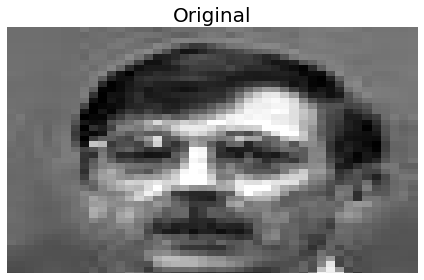

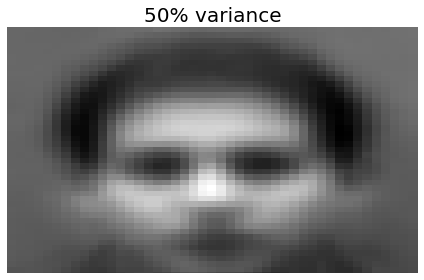

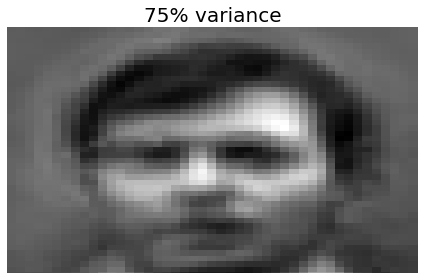

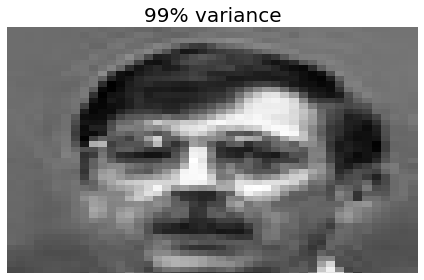

In [6]:
plotImg(data[0, :],'Original') 

pca = PCA(n_components=3)
data_red = pca.fit_transform(data)
data_rec = reconstruction(data_red,pca,3)
plotImg(data_rec[0, :],'50% variance')


pca = PCA(n_components=18)
data_red = pca.fit_transform(data)
data_rec = reconstruction(data_red,pca,18)
plotImg(data_rec[0, :],'75% variance')

pca = PCA(n_components=380)
data_red = pca.fit_transform(data)
data_rec = reconstruction(data_red,pca,380)
plotImg(data_rec[0, :],'99% variance')

<h3 style="color:rgb(210,90,80)">Exercise 5:</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?


1. By 50% of the variance image is very blured and we can get only main structure of the picture without any details

2. By 75% of the variance image we are getting more details but still not perfect image.

3. by 99% it's looks exact like original(maybe with slight differences, which are not observed by human eyes)

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [7]:
#Read data.
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6:</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

Proportion of varianve explained: [0.593217 0.406783]


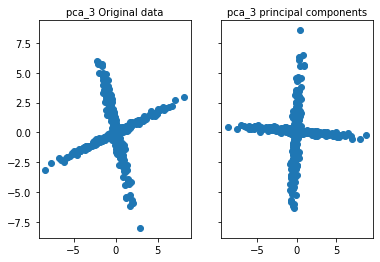

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

pca = PCA()
pca_3 = pca.fit_transform(data3)
ax1.scatter(data3[:,0],data3[:,1])
ax1.set_title('pca_3 Original data',fontsize = 10)

ax2.scatter(pca_3[:,0],pca_3[:,1])
ax2.set_title('pca_3 principal components',fontsize = 10)

print('Proportion of varianve explained:',pca.explained_variance_ratio_)

Proportion of variance explained: [0.54469358 0.45530642]


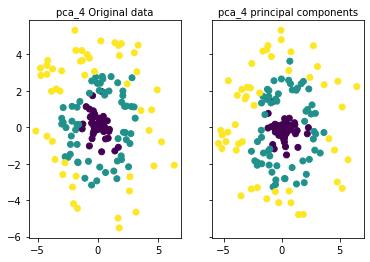

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

pca = PCA()
pca_4 = pca.fit_transform(data4[:,:2])
ax1.scatter(data4[:,0],data4[:,1],c = data4[:,2])
ax1.set_title('pca_4 Original data',fontsize = 10)

ax2.scatter(pca_4[:,0],pca_4[:,1],c = data4[:,2])
ax2.set_title('pca_4 principal components',fontsize = 10)

print('Proportion of variance explained:',pca.explained_variance_ratio_)

<h3 style="color:rgb(0,120,170)">Exercise 7:</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

Text(0.5, 1.0, 'Poly Kernel')

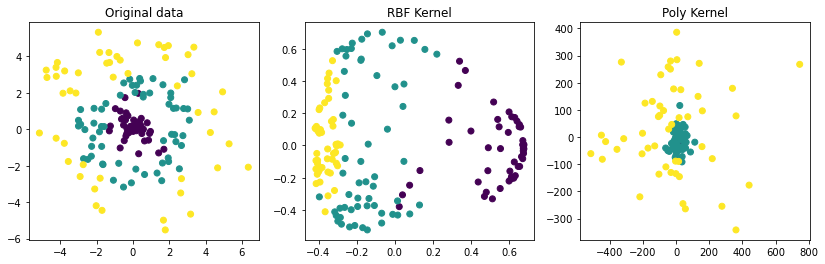

In [10]:
kernel_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=0.25)
kernel_rbf_pca_4 = kernel_rbf.fit_transform(data4[:,:2])

kernel_poly = KernelPCA(n_components=2, kernel="poly", gamma=2,degree = 3)
kernel_poly_pca_4 = kernel_poly.fit_transform(data4[:,:2])

fig, (orig_data_ax, rbf_ax, poly_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)


orig_data_ax.scatter(data4[:,0], data4[:,1], c = data4[:,2])
orig_data_ax.set_title("Original data")

rbf_ax.scatter(kernel_rbf_pca_4[:,0], kernel_rbf_pca_4[:,1], c = data4[:,2])
rbf_ax.set_title("RBF Kernel")

poly_ax.scatter(kernel_poly_pca_4[:,0], kernel_poly_pca_4[:,1], c = data4[:,2])
poly_ax.set_title("Poly Kernel")

<h3 style="color:rgb(0,120,170)">Exercise 8:</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


**Advantages:**

1. Kernel PCA works well for non-liniarities. Linear PCA doesn't.

**Disadvantages:**

1. Interpretability. PCA provides a set of weights that define a linear mapping from the input space to the low-dimensional embedding space. These weights can provide useful information about the structure of the data. No such weights exist for kPCA with nonlinear kernels because the mapping is nonlinear

2. Inverse mapping. PCA provides an inverse mapping from the low-dimensional space back to the input space. So, input points can be approximately reconstructed from their low-dimensional images.

3. Computational cost: PCA is much faster and kernel PCA struggles with huge datasets.
